In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [54]:
X_train_full.shape, X_train_full.dtype, X_test.shape

((60000, 28, 28), dtype('uint8'), (10000, 28, 28))

In [55]:
# Creating a Validation Set and converting the values in 0-1, neural network tends to perfrom better with scaled values 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [56]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [57]:
# Making the Class names to identify the features 
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [58]:
class_names[y_train[0]]

'Coat'

In [59]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
# In Multi-Class we use softmax as the activation function in the last layer. And 10 because we have 10 inputs
model.add(keras.layers.Dense(10, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )


In [62]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 958us/step - loss: 0.7246 - accuracy: 0.7635 - val_loss: 0.5057 - val_accuracy: 0.8376
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4880 - accuracy: 0.8304 - val_loss: 0.4495 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4429 - accuracy: 0.8452 - val_loss: 0.4308 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 2s 941us/step - loss: 0.4161 - accuracy: 0.8545 - val_loss: 0.3974 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3970 - accuracy: 0.8603 - val_loss: 0.3847 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3805 - accuracy: 0.8667 - val_loss: 0.3944 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8719 - val_loss: 0.3588 - val_accur

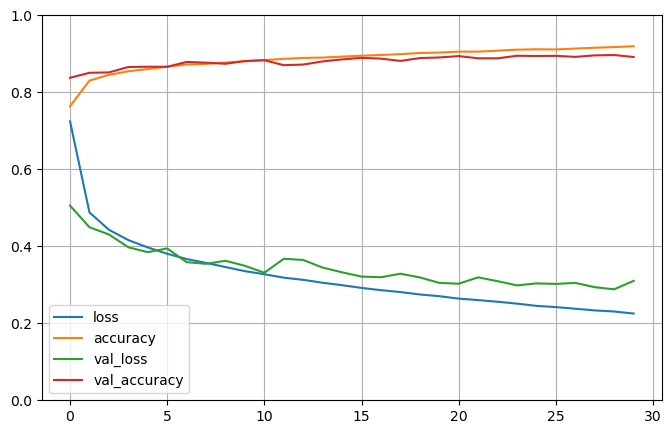

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 550us/step - loss: 65.1212 - accuracy: 0.8510


[65.12120819091797, 0.8510000109672546]